In [1]:
'''
    Author: Bhogaraju Shanmukha Sri Krishna
    RollNo: 112201013
    Class: CSE S5
'''
print("Hello world!") # Haha finished editing

print("Hello world")

Hello world!
Hello world


In [2]:
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
'''
1A Load the given train and test data CSV files
'''

trainDF = pd.read_csv('./train_data.csv')
testDF = pd.read_csv('./test_data.csv')

In [4]:
trainDF.isnull().sum()

feature1    0
feature2    0
target      0
dtype: int64

In [5]:
testDF.isnull().sum()

feature1    0
feature2    0
target      0
dtype: int64

In [6]:
trainDF

Xtrain = np.column_stack([trainDF['feature1'], trainDF['feature2']])
Ytrain = np.array(trainDF['target'])
Xtrain, Ytrain

(array([[ 0.48952925, -0.21157406],
        [ 0.53072   , -0.72801374],
        [-1.05520029, -0.06290865],
        ...,
        [-0.03546116, -1.10160902],
        [ 1.06323187,  0.20956851],
        [ 0.35635873, -0.34225083]]),
 array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 

In [7]:
red = np.array([(trainDF['feature1'][i], trainDF['feature2'][i]) for i in range(len(Xtrain)) if Ytrain[i] == 1])
blue = np.array([(trainDF['feature1'][i], trainDF['feature2'][i]) for i in range(len(Xtrain)) if Ytrain[i] == 0])

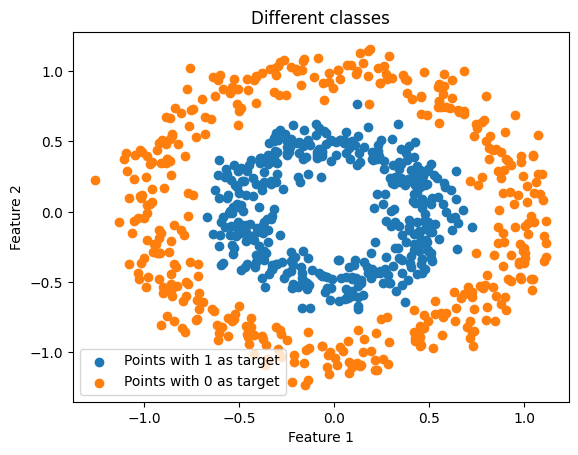

In [8]:
'''
    1B. Plot the data points in a 2D plot with different colors for the two classes
'''

import matplotlib.pyplot as plt

redx1 = [i[0] for i in red]
redx2 = [i[1] for i in red]

bluex1 = [i[0] for i in blue]
bluex2 = [i[1] for i in blue]

plt.title("Different classes")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(redx1, redx2, label = "Points with 1 as target")
plt.scatter(bluex1, bluex2, label = "Points with 0 as target")
plt.legend()

In [9]:
len(Xtrain) == len(Ytrain)

True

In [10]:
'''
    1C. Create an instance of the SVC (kernel = ‘linear’, C=0.2) and fit the model
'''

from sklearn import svm
clf = svm.SVC(kernel = 'linear', C=0.2) 
clf.fit(Xtrain, Ytrain)

SVC(C=0.2, kernel='linear')

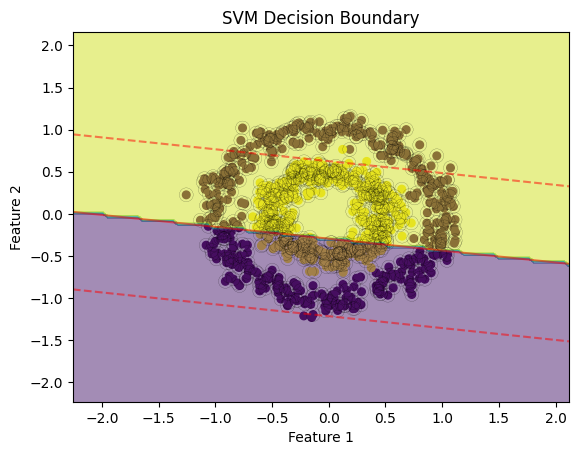

In [15]:
'''
    1D. Plot the SVM boundary regions (as shown in following figure) learned by the classifier.
'''

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

clf1 = clf

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf1,
    Xtrain,
    plot_method="contour",
    colors="r",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)



plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, s=30)


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
DecisionBoundaryDisplay.from_estimator(
    clf1, Xtrain, response_method="predict",
    alpha=0.5, ax = ax
)

# plot support vectors
ax.scatter(
    clf1.support_vectors_[:, 0],
    clf1.support_vectors_[:, 1],
    s=100,
    linewidth=0.1,
    facecolors="none",
    edgecolors="k"
)

In [14]:
testDF

,feature1,feature2,target
0,-0.183067,0.390134,1
1,0.168505,0.869701,0
2,-0.370716,-0.151243,1
3,-0.174255,1.020947,0
4,0.180431,-0.649801,1
...,...,...,...
195,0.682261,0.593896,0
196,-0.445419,0.094120,1
197,0.862200,-0.094400,0
198,-0.321888,0.404748,1


In [15]:
Xtest = np.column_stack([testDF['feature1'], testDF['feature2']])
Ytest = np.array(testDF['target'])

In [16]:
Ypred = clf.predict(Xtrain)

In [17]:
'''
    1E. Print the classification report for training data
'''
from sklearn.metrics import classification_report

targetNames = ['Class 0', 'Class 1']

print(classification_report(Ytrain, Ypred, target_names = targetNames))

              precision    recall  f1-score   support

     Class 0       0.60      0.43      0.50       400
     Class 1       0.55      0.71      0.62       400

    accuracy                           0.57       800
   macro avg       0.57      0.57      0.56       800
weighted avg       0.57      0.57      0.56       800



In [18]:
'''
    1F. Predict the labels y for the test data and store them in a new column named 'svm_prediction' in this given test CSV file
'''

YTestPred = clf.predict(Xtest)
YTestPred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

In [19]:
testDF['svm_prediction'] = YTestPred
testDF

,feature1,feature2,target,svm_prediction
0,-0.183067,0.390134,1,1
1,0.168505,0.869701,0,1
2,-0.370716,-0.151243,1,1
3,-0.174255,1.020947,0,1
4,0.180431,-0.649801,1,0
...,...,...,...,...
195,0.682261,0.593896,0,1
196,-0.445419,0.094120,1,1
197,0.862200,-0.094400,0,1
198,-0.321888,0.404748,1,1


In [20]:
'''
    2A. Create an instance of the SVC (C=0.2) for different kernels ("sigmoid", "poly","rbf") and fit the model.
'''

sig = svm.SVC(C = 0.2, kernel = 'sigmoid')
poly = svm.SVC(C = 0.2, kernel = 'poly')
rbf = svm.SVC(C = 0.2, kernel = 'rbf')

sig.fit(Xtrain, Ytrain)
poly.fit(Xtrain, Ytrain)
rbf.fit(Xtrain, Ytrain)

SVC(C=0.2)

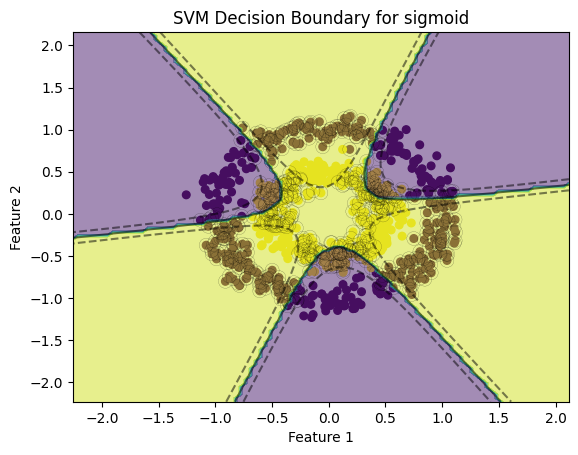

In [22]:
'''
    2B. Plot the SVM boundary regions learned by each kernel classifier
'''

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary for sigmoid')
# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    sig,
    Xtrain,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)

plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, s=30)

DecisionBoundaryDisplay.from_estimator(
    sig, Xtrain, response_method="predict",
    alpha=0.5, ax = ax
)

# plot support vectors
ax.scatter(
    sig.support_vectors_[:, 0],
    sig.support_vectors_[:, 1],
    s=100,
    linewidth=0.1,
    facecolors="none",
    edgecolors="k"
)

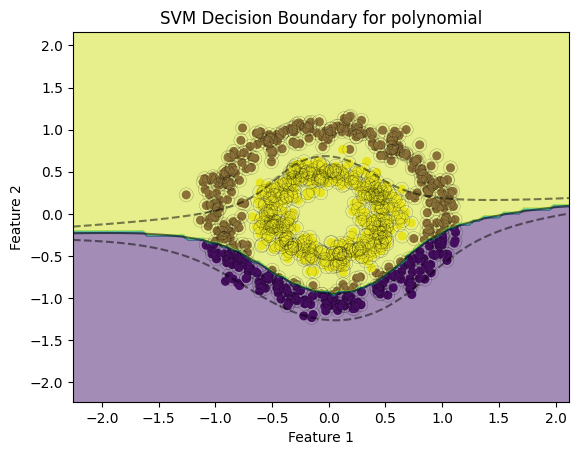

In [23]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, s=30)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary for polynomial')
# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    poly,
    Xtrain,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
    
)

DecisionBoundaryDisplay.from_estimator(
    poly, Xtrain, response_method="predict",
    alpha=0.5, ax = ax
)

# plot support vectors
ax.scatter(
    poly.support_vectors_[:, 0],
    poly.support_vectors_[:, 1],
    s=100,
    linewidth=0.1,
    facecolors="none",
    edgecolors="k"
)

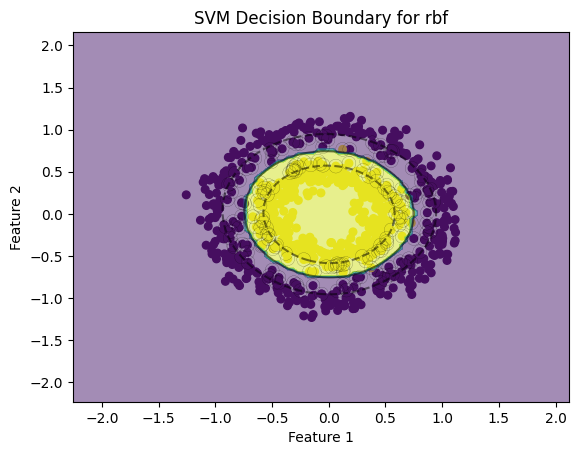

In [28]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, s=30)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary for rbf')
# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    rbf,
    Xtrain,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)

DecisionBoundaryDisplay.from_estimator(
    rbf, Xtrain, response_method="predict",
    alpha=0.5, ax = ax
)

# plot support vectors
ax.scatter(
    rbf.support_vectors_[:, 0],
    rbf.support_vectors_[:, 1],
    s=100,
    linewidth=0.1,
    facecolors="none",
    edgecolors="k"
)

In [29]:
'''
    2C. Print the classification report for training data for each kernel.
'''

targetNames = ['Class 0', 'Class 1']

yPredSig = sig.predict(Xtrain)
yPredPoly = poly.predict(Xtrain)
yPredRbf = rbf.predict(Xtrain)

print("Classification report for sigmoid\n" ,classification_report(Ytrain, yPredSig, target_names = targetNames))
print("Classification report for polynomial\n" ,classification_report(Ytrain, yPredPoly, target_names = targetNames))
print("Classification report for Rbf\n" ,classification_report(Ytrain, yPredRbf, target_names = targetNames))

Classification report for sigmoid
               precision    recall  f1-score   support

     Class 0       0.68      0.45      0.54       400
     Class 1       0.59      0.79      0.67       400

    accuracy                           0.62       800
   macro avg       0.63      0.62      0.60       800
weighted avg       0.63      0.62      0.60       800

Classification report for polynomial
               precision    recall  f1-score   support

     Class 0       1.00      0.39      0.56       400
     Class 1       0.62      1.00      0.76       400

    accuracy                           0.69       800
   macro avg       0.81      0.69      0.66       800
weighted avg       0.81      0.69      0.66       800

Classification report for Rbf
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       400
     Class 1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00 

In [30]:
'''
    2D. Predict the labels y for the data points provided in test_data.csv and store them 
    in this CSV file's new column named ’[kernel]_kernel_prediction’
'''

classifiers = {'poly': poly, 'rbf': rbf, 'sig': sig}

yPredD = {}
for clf in classifiers:
    yPredD[clf] = classifiers[clf].predict(Xtest)

    fstr = f'{clf}_kernel_prediction'
    testDF[fstr] = yPredD[clf]

testDF

,feature1,feature2,target,svm_prediction,poly_kernel_prediction,rbf_kernel_prediction,sig_kernel_prediction
0,-0.183067,0.390134,1,1,1,1,1
1,0.168505,0.869701,0,1,1,0,1
2,-0.370716,-0.151243,1,1,1,1,1
3,-0.174255,1.020947,0,1,1,0,1
4,0.180431,-0.649801,1,0,1,1,0
...,...,...,...,...,...,...,...
195,0.682261,0.593896,0,1,1,0,0
196,-0.445419,0.094120,1,1,1,1,1
197,0.862200,-0.094400,0,1,1,0,1
198,-0.321888,0.404748,1,1,1,1,1


In [31]:
'''
    2E. Submit the updated test CSV file
'''

testDF.to_csv('112201013_lab6_test_data.csv')

In [ ]:
'''
    2F. Write your observations with comparisons for linear and nonlinear classifiers
    This is an observation task

    Non Linear classifiers are far more better than linear classifier

    RBF: Had the best prediction among all the given classifiers
    Polynomial: Next better than the RBF classifier
    Sigmoid: Almost close to polynomial, given this rank only after observing the classification report
    Linear: Easiest to understand and implement but had the worst prediction
'''

In [32]:
ubdf = pd.read_csv('./UniversalBank.csv')
ubdf

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [33]:
ubdf.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [34]:
'''
    3B. Do the standardization and required pre-processing on the dataset.
'''

from sklearn.preprocessing import StandardScaler

X = []
for key in ubdf:
    if key != 'CreditCard' and len(X) != 0:    
        X = np.column_stack([X, ubdf[key]])
    if len(X) == 0 and key != 'CreditCard':
        X = np.array(ubdf[key])
        

y = np.array(ubdf['CreditCard'])

stdsc = StandardScaler()
stdsc.fit(X, y)

Xt = stdsc.transform(X)
Xt

array([[-1.73170443, -1.77441684, -1.66607847, ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-1.73101161, -0.02952359, -0.09633022, ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-1.73031879, -0.55299157, -0.44516316, ..., -0.34142334,
        -0.25354028, -1.21661774],
       ...,
       [ 1.73031879,  1.54088033,  1.64783451, ..., -0.34142334,
        -0.25354028, -1.21661774],
       [ 1.73101161,  1.71536965,  1.73504275, ..., -0.34142334,
        -0.25354028,  0.82195086],
       [ 1.73170443, -1.51268285, -1.40445376, ..., -0.34142334,
        -0.25354028,  0.82195086]])

In [44]:
'''
    3C. Define a param_grid dictionary with the list of permissible values for the
    hyper-parameters “C”,” kernel”, “gamma”, and “degree”. 3
    ● Kernel - [’linear’, ‘poly’, ‘rbf’,’sigmoid’]
    ● Vary C between 1e-5 to 10 in multiples of 10.
    ● Gamma - [‘scale’,’ auto’]
    ● Degree - [2,3,4,5]
'''

from sklearn.model_selection import train_test_split

clist = [10**i for i in range(-5, 2)]

XtrainUB, XtestUB, YtrainUB, YtestUB = train_test_split(Xt, y, test_size = 0.33, random_state = 42)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': clist,
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5],
}
param_grid

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
 'gamma': ['scale', 'auto'],
 'degree': [2, 3, 4, 5]}

In [45]:
from sklearn.model_selection import GridSearchCV

tsvc = svm.SVC()
tclf = GridSearchCV(tsvc, param_grid, verbose = 3)
tclf.fit(XtrainUB, YtrainUB)
tclf

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV 1/5] END C=1e-05, degree=2, gamma=scale, kernel=linear;, score=0.700 total time=   0.1s
[CV 2/5] END C=1e-05, degree=2, gamma=scale, kernel=linear;, score=0.700 total time=   0.1s
[CV 3/5] END C=1e-05, degree=2, gamma=scale, kernel=linear;, score=0.700 total time=   0.1s
[CV 4/5] END C=1e-05, degree=2, gamma=scale, kernel=linear;, score=0.701 total time=   0.1s
[CV 5/5] END C=1e-05, degree=2, gamma=scale, kernel=linear;, score=0.701 total time=   0.1s
[CV 1/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.700 total time=   0.1s
[CV 2/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.700 total time=   0.1s
[CV 3/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.700 total time=   0.1s
[CV 4/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.701 total time=   0.1s
[CV 5/5] END C=1e-05, degree=2, gamma=scale, kernel=poly;, score=0.701 total time=   0.1s
[CV 1/5] END C=1e-05, degr

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [46]:
'''
    3D. Select the best hyperparameter value to train the final model.
'''
tclf.best_params_


{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [49]:
'''
    Another method
'''

newClf = svm.SVC(C = 10, degree = 2, gamma = 'scale', kernel = 'poly')
newClf.fit(XtrainUB, YtrainUB)

SVC(C=10, degree=2, kernel='poly')

In [50]:
ypred2 = newClf.predict(XtestUB)

print(print("Classification report for Rbf\n" ,classification_report(YtestUB, ypred2, target_names = targetNames)))

Classification report for Rbf
               precision    recall  f1-score   support

     Class 0       0.75      0.99      0.85      1183
     Class 1       0.87      0.16      0.27       467

    accuracy                           0.76      1650
   macro avg       0.81      0.58      0.56      1650
weighted avg       0.78      0.76      0.69      1650

None


In [47]:
'''
    3E. Print the classification report for test data
    Method 2: Directly with tclf
'''


yPredUB = tclf.predict(XtestUB)

print("Classification report for Rbf\n" ,classification_report(YtestUB, yPredUB, target_names = targetNames))

Classification report for Rbf
               precision    recall  f1-score   support

     Class 0       0.75      0.99      0.85      1183
     Class 1       0.87      0.16      0.27       467

    accuracy                           0.76      1650
   macro avg       0.81      0.58      0.56      1650
weighted avg       0.78      0.76      0.69      1650

